<a href="https://colab.research.google.com/github/tgiangregorio/Medical_Genomics/blob/main/ROH.statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####***Runs of Homozygosity (ROH) from WES data: inbred vs outbred cohort***

##### ***Library Loading***

In [64]:
library(dplyr)
library(ggplot2)

##### ***Import Audacity results***

In [65]:
AudacityROHResult<-read.delim("https://raw.githubusercontent.com/tgiangregorio/Medical_Genomics/main/AudacityROHresults.txt", sep="\t", header=TRUE, na.strings = "NA", stringsAsFactors = T)
head(AudacityROHResult)


,ID,Chrom,Start,End,Length,n_Hom_R,n_Hom_A,n_Het,Score,Status
,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<fct>
1,I01,chr2,27245011,27746394,501383,993,26,5,4.2251317,consanguineous
2,I01,chr2,96930843,97039158,108315,212,12,0,9.0521127,consanguineous
3,I01,chr10,96256984,97082649,825665,284,22,1,13.1372629,consanguineous
4,I01,chr2,95537245,96517570,980325,318,8,2,0.1589894,consanguineous
5,I01,chr16,70285001,70930069,645068,715,13,3,6.7389611,consanguineous
6,I01,chr2,220032814,220252583,219769,497,30,1,5.5739814,consanguineous


In [67]:
summary(AudacityROHResult)

       ID           Chrom          Start                End           
 I14    : 235   chr1   : 426   Min.   :    41509   Min.   :   196447  
 I11    : 233   chr2   : 349   1st Qu.: 33641250   1st Qu.: 34925543  
 I12    : 230   chr19  : 289   Median : 60468254   Median : 61323668  
 I17    : 228   chr11  : 271   Mean   : 74684827   Mean   : 75913772  
 I16    : 226   chr3   : 248   3rd Qu.:109335977   3rd Qu.:110874514  
 I07    : 223   chr12  : 209   Max.   :249106111   Max.   :249212633  
 (Other):2662   (Other):2245                                          
     Length            n_Hom_R           n_Hom_A           n_Het       
 Min.   :     374   Min.   :   21.0   Min.   :  0.00   Min.   : 0.000  
 1st Qu.:  310707   1st Qu.:  230.0   1st Qu.:  6.00   1st Qu.: 0.000  
 Median :  572945   Median :  334.0   Median : 13.00   Median : 1.000  
 Mean   : 1228945   Mean   :  494.6   Mean   : 21.53   Mean   : 1.547  
 3rd Qu.: 1122195   3rd Qu.:  518.0   3rd Qu.: 24.00   3rd Qu.: 2.000  


##### ***Distributions of short and long ROH***

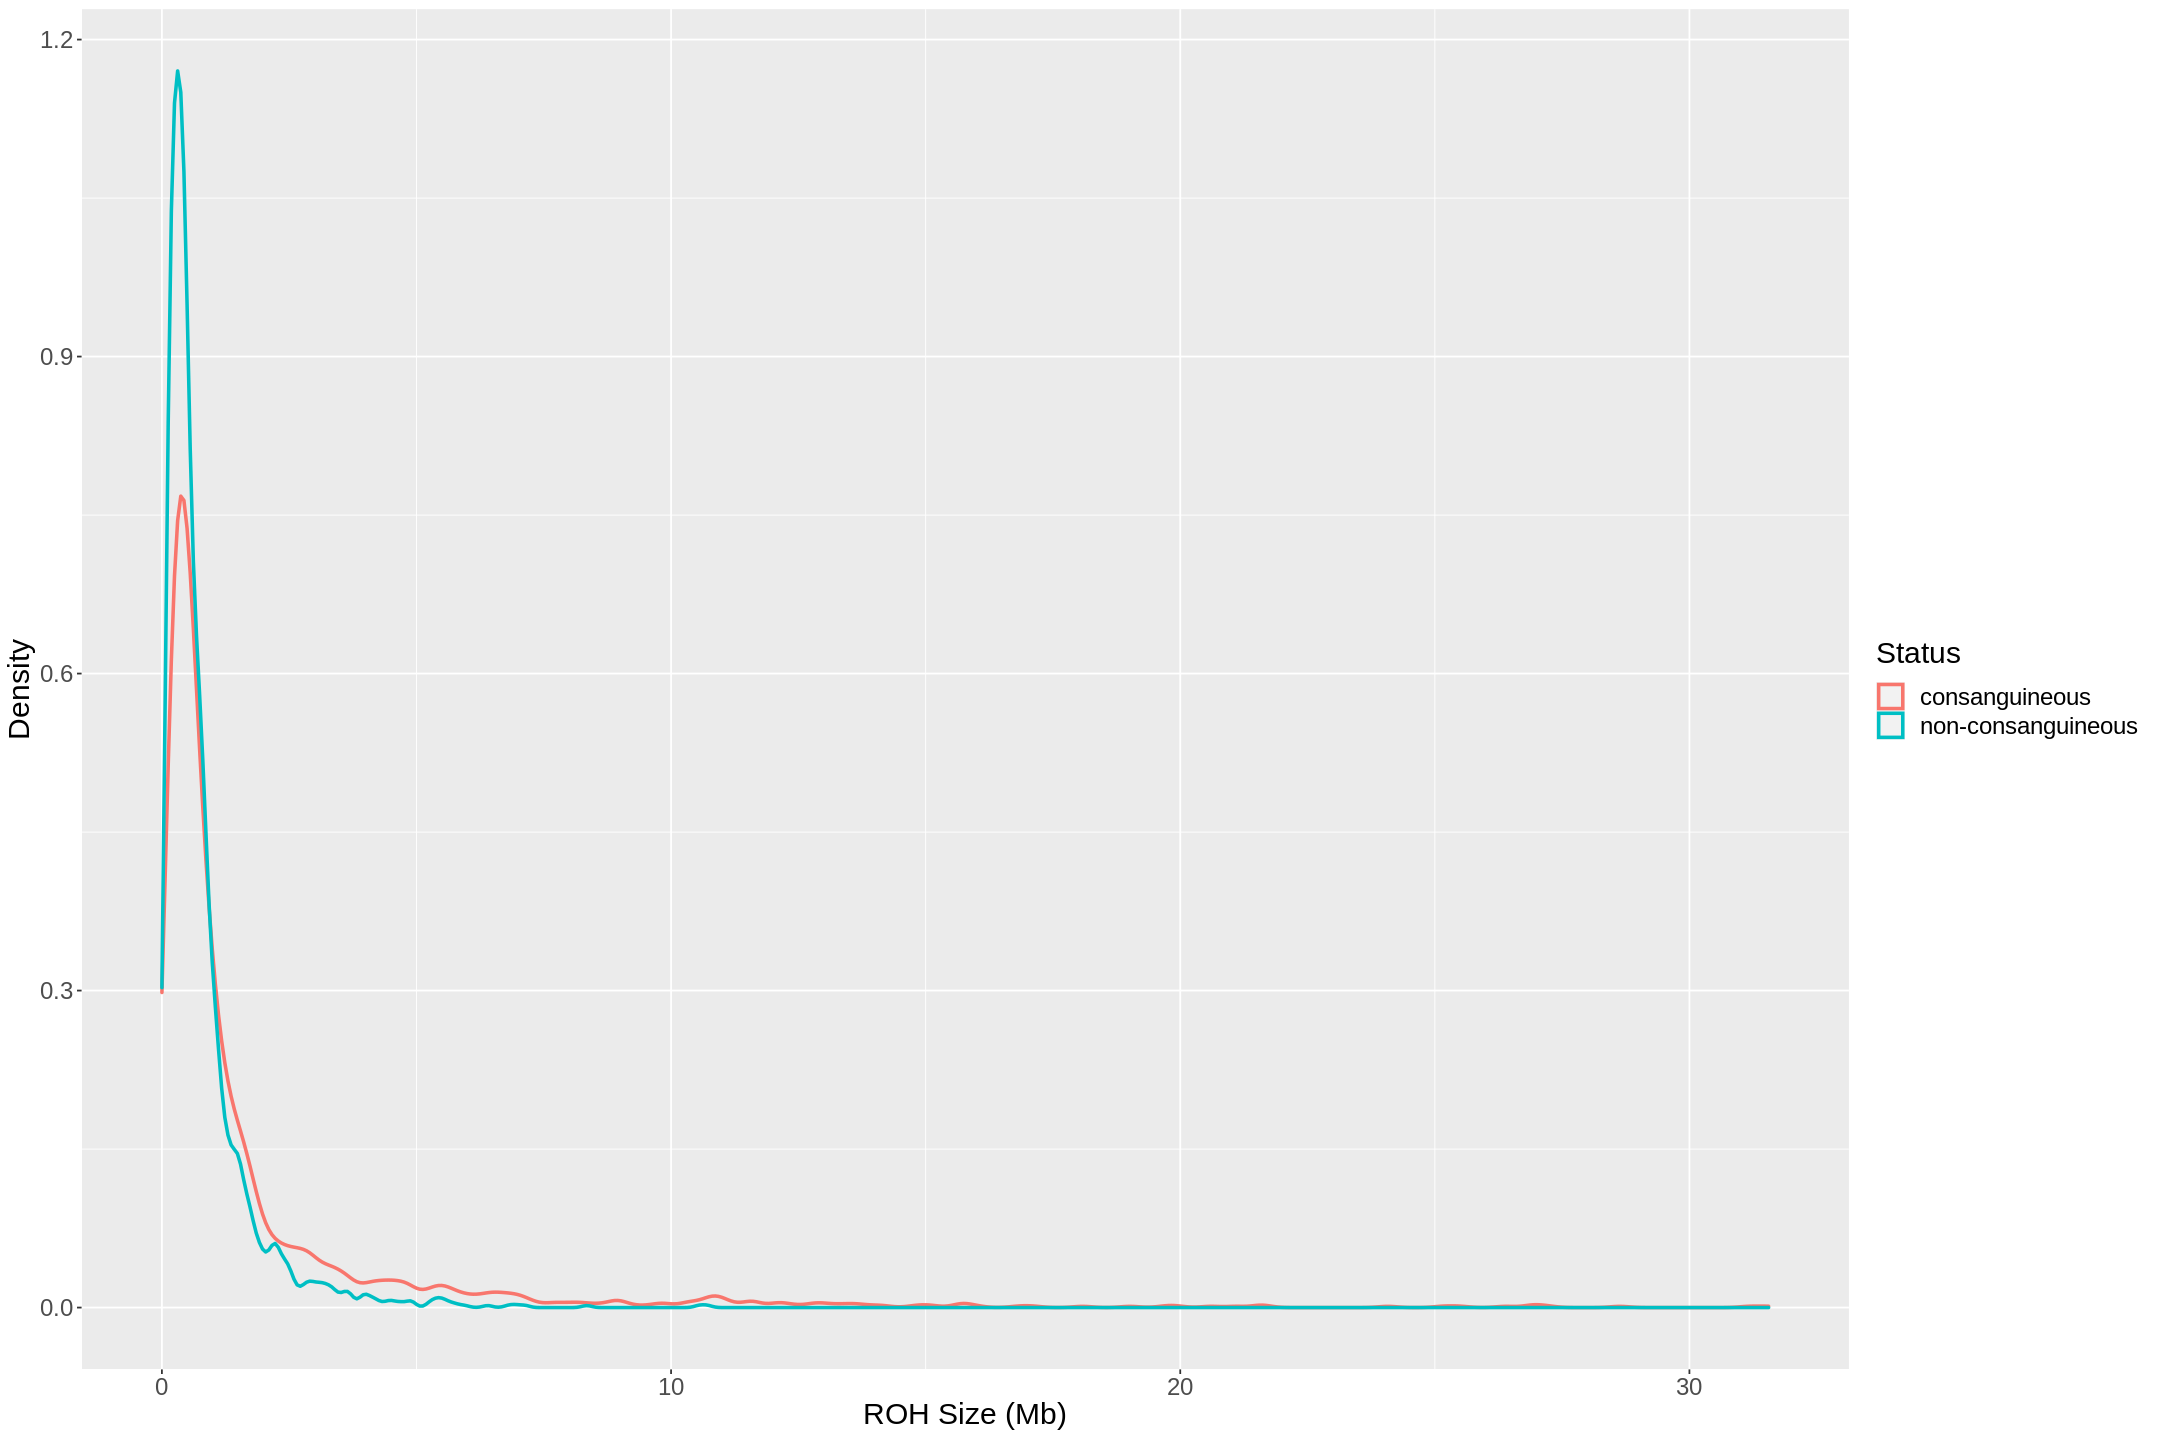

In [63]:
options(repr.plot.width=18, repr.plot.height=12)
ggplot(AudacityROHResult,aes(x =Length/1000000, color=Status)) +
 geom_density(size=1) +
 xlab("ROH Size (Mb)") +
 ylab("Density") +
 geom_vline(aes(xintercept="")) +
 theme(text=element_text(size=18))
   #axis.title.x = element_text(size=16) , 
   #axis.title.y = element_text(size=16), 
   #legend.text = element_text(size=14),
   #legend.title = element_text(size=16))

In [ ]:
ROHSummary<- AudacityROHResult %>% 
  group_by(ID,  Status) %>% 
  summarize(ScoreROH=sum(Score),sROH=sum(Length),nROH=n())

ROHSummary

In [ ]:
AudacityROHResult_1.5Mb<- AudacityROHResult %>% 
  filter(Length>1500000)
  dim(AudacityROHResult_1.5Mb)

In [ ]:
ROHSummary_1.5Mb<- AudacityROHResult %>% 
  filter(Length>1500000) %>% 
  group_by(ID,  Status) %>% 
  summarize(ScoreROH=sum(Score),sROH=sum(Length),nROH=n())

  ROHSummary_1.5Mb

In [ ]:
ROHSummary_1.5Mb<- AudacityROHResult %>% 
  filter(Length>1500000) %>% 
  group_by(ID,  Status) %>% 
  summarize(ScoreROH=sum(Score),sROH=sum(Length),nROH=n())

  ROHSummary_1.5Mb

In [27]:
ROHSummary_1.5Mb<- AudacityROHResult %>% 
  filter(Length>1500000) %>% 
  group_by(ID,  Status) %>% 
  summarize(ScoreROH=sum(Score),sROH=sum(Length),nROH=n())

  ROHSummary_1.5Mb

`summarise()` has grouped output by 'ID'. You can override using the `.groups` argument.



ID,Status,ScoreROH,sROH,nROH
<fct>,<fct>,<dbl>,<int>,<int>
I01,consanguineous,959.7029,115173982,36
I02,consanguineous,1277.3736,176948904,40
I03,consanguineous,3267.9328,242769024,38
I04,consanguineous,1744.6342,206046124,40
I05,consanguineous,2945.2749,341612047,63
I06,consanguineous,2782.9252,288095117,66
I07,consanguineous,2007.9762,244375629,51
I08,consanguineous,2328.1807,306723454,60
I09,consanguineous,725.1928,106509219,23


ERROR while rich displaying an object: Error in FUN(X[[i]], ...): object 'sROH' not found

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_text.default(obj)
9. paste(cap

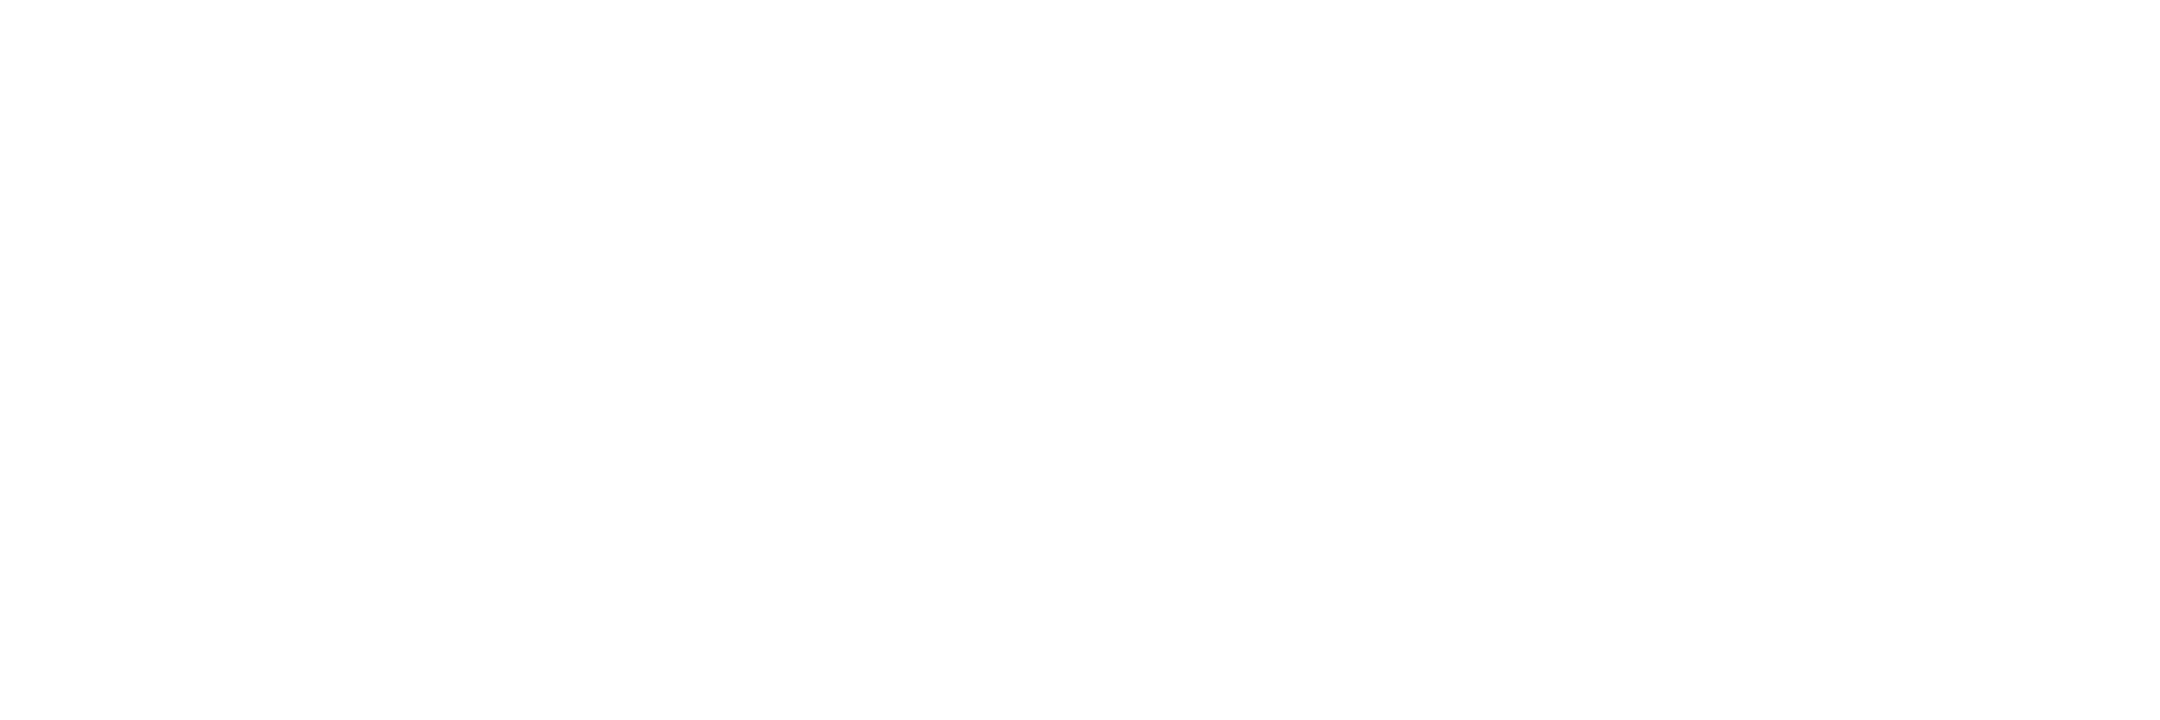

In [28]:
#par(mfrow=c(2,1))
#ggplot(ROHSummary, aes(x=Status,y=sROH, fill=Status)) + geom_violin(trim = FALSE) + geom_boxplot(width=0.1) + ggtitle("SROHS")
ggplot(AudacityROHResult, aes(x=Status,y=sROH, fill=Status)) + geom_violin(trim = T) + geom_boxplot(width=0.1) + ggtitle("SROHS")



In [12]:
c<-ggplot(ROHSummary,       aes(x=Status,y= ScoreROH, fill=Status)) + geom_violin(trim = FALSE) + geom_boxplot(width=0.1, fill="white") 
d<-ggplot(ROHSummary_1.5Mb, aes(x=Status,y= ScoreROH, fill=Status)) + geom_violin(trim = FALSE) + geom_boxplot(width=0.1, fill="white") 

e<-ggplot(ROHSummary,       aes(x=Status,y= nROH, fill=Status)) + geom_violin(trim = FALSE) + geom_boxplot(width=0.1, fill="white")
f<-ggplot(ROHSummary_1.5Mb, aes(x=Status,y= nROH, fill=Status)) + geom_violin(trim = FALSE) + geom_boxplot(width=0.1, fill="white")


g<-ggplot(ROHSummary, aes(x = sROH, y = nROH)) + geom_point(aes(colour = factor(Status)))
h<-ggplot(ROHSummary_1.5Mb, aes(x = sROH, y = nROH)) + geom_point(aes(colour = factor(Status)))
